In [12]:
import pandas as pd
import getpass, os
os.environ['PSQL_USER']='dengueadmin'
os.environ['PSQL_HOST']='localhost'
os.environ['PSQL_DB']='dengue'
os.environ['PSQL_PASSWORD']=getpass.getpass("Enter the database password: ")

entre a senha do banco: ········


In [34]:
from infodenguepredict.data.infodengue import get_temperature_data, get_alerta_table, get_tweet_data
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Loading The Data

for our exploration let's pick the city of Rio de Janeiro.

In [37]:
A = get_alerta_table(3304557)#(3303500)
T = get_temperature_data(3304557)#(3303500)
Tw = get_tweet_data(3304557)#(3303500)

Let's look at the tables

In [38]:
A[:10]

,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,nivel,versao_modelo,municipio_nome
data_iniSE,,,,,,,,,,,,
2010-01-03,201001,30.0,30,30,30,3304557,0.000000,0.464851,0,1,2016-08-30,Rio de Janeiro
2010-01-10,201002,46.0,46,46,46,3304557,0.000000,0.712771,0,1,2016-08-30,Rio de Janeiro
2010-01-17,201003,30.0,30,30,30,3304557,0.000000,0.464851,0,1,2016-08-30,Rio de Janeiro
2010-01-24,201004,51.0,51,51,51,3304557,0.000000,0.790247,0,1,2016-08-30,Rio de Janeiro
2010-01-31,201005,58.0,58,58,58,3304557,0.000000,0.898712,0,1,2016-08-30,Rio de Janeiro
2010-02-07,201006,58.0,58,58,58,3304557,0.866734,0.898712,0,1,2016-08-30,Rio de Janeiro
2010-02-14,201007,40.0,40,40,40,3304557,0.115123,0.619801,0,1,2016-08-30,Rio de Janeiro
2010-02-21,201008,62.0,62,62,62,3304557,0.822200,0.960692,0,1,2016-08-30,Rio de Janeiro
2010-02-28,201009,76.0,76,76,76,3304557,0.977246,1.177620,0,1,2016-08-30,Rio de Janeiro


In [39]:
T[:10]

,temp_min,umid_min,pressao_min
data_dia,,,
2011-12-31,22.0,57.0,1007.0
2011-12-31,22.0,57.0,1007.0
2012-01-01,23.0,65.0,1003.0
2012-01-02,21.0,75.0,1003.0
2012-01-03,20.0,49.0,1008.0
2012-01-04,22.0,52.0,1011.0
2012-01-05,21.0,65.0,1012.0
2012-01-06,23.0,44.0,1009.0
2012-01-07,23.0,36.0,1011.0


In [40]:
Tw[:10]

,Municipio_geocodigo,numero,CID10_codigo
data_dia,,,
2012-08-01,3304557,26,A90
2012-08-02,3304557,10,A90
2012-08-03,3304557,31,A90
2012-08-04,3304557,15,A90
2012-08-05,3304557,8,A90
2012-08-06,3304557,2,A90
2012-08-07,3304557,15,A90
2012-08-08,3304557,22,A90
2012-08-09,3304557,16,A90


Let's try to join the tables by date.

In [41]:
Full = A.join(T).join(Tw)
Full[:10]

,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,nivel,versao_modelo,municipio_nome,temp_min,umid_min,pressao_min,Municipio_geocodigo,numero,CID10_codigo
2010-01-03,201001,30.0,30,30,30,3304557,0.000000,0.464851,0,1,2016-08-30,Rio de Janeiro,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-10,201002,46.0,46,46,46,3304557,0.000000,0.712771,0,1,2016-08-30,Rio de Janeiro,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-17,201003,30.0,30,30,30,3304557,0.000000,0.464851,0,1,2016-08-30,Rio de Janeiro,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-24,201004,51.0,51,51,51,3304557,0.000000,0.790247,0,1,2016-08-30,Rio de Janeiro,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-31,201005,58.0,58,58,58,3304557,0.000000,0.898712,0,1,2016-08-30,Rio de Janeiro,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-07,201006,58.0,58,58,58,3304557,0.866734,0.898712,0,1,2016-08-30,Rio de Janeiro,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-14,201007,40.0,40,40,40,3304557,0.115123,0.619801,0,1,2016-08-30,Rio de Janeiro,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-21,201008,62.0,62,62,62,3304557,0.822200,0.960692,0,1,2016-08-30,Rio de Janeiro,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28,201009,76.0,76,76,76,3304557,0.977246,1.177620,0,1,2016-08-30,Rio de Janeiro,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-07,201010,77.0,77,77,77,3304557,0.928069,1.193120,0,1,2016-08-30,Rio de Janeiro,NaN,NaN,NaN,NaN,NaN,NaN


Note que as datas para as datas mais antigas os dados faltantes de Temperatura e Tweets, foram substituídos por NaN. Podemos remover estas datas, ficando com uma tabela sem dados faltantes.

In [42]:
Short = Full.dropna()
Short[:10]

,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,nivel,versao_modelo,municipio_nome,temp_min,umid_min,pressao_min,Municipio_geocodigo,numero,CID10_codigo
2012-08-05,201232,476.0,476,476,476,3304557,8.592810e-10,7.37563,0,1,2016-08-30,Rio de Janeiro,18.0,30.0,1015.0,3304557.0,8.0,A90
2012-08-12,201233,488.0,488,488,488,3304557,3.697820e-03,7.56157,0,1,2016-08-30,Rio de Janeiro,17.0,29.0,1021.0,3304557.0,7.0,A90
2012-08-19,201234,385.0,385,385,385,3304557,2.193860e-05,5.96559,0,1,2016-08-30,Rio de Janeiro,19.0,33.0,1024.0,3304557.0,7.0,A90
2012-08-26,201235,326.0,326,326,326,3304557,3.872880e-06,5.05138,0,1,2016-08-30,Rio de Janeiro,17.0,45.0,1020.0,3304557.0,9.0,A90
2012-09-02,201236,213.0,213,213,213,3304557,5.574430e-13,3.30044,0,1,2016-08-30,Rio de Janeiro,18.0,37.0,1016.0,3304557.0,10.0,A90
2012-09-09,201237,376.0,376,376,376,3304557,9.642110e-01,5.82613,0,1,2016-08-30,Rio de Janeiro,21.0,9.0,1013.0,3304557.0,13.0,A90
2012-09-16,201238,273.0,273,273,273,3304557,1.470320e-01,4.23014,0,1,2016-08-30,Rio de Janeiro,19.0,29.0,1012.0,3304557.0,7.0,A90
2012-09-23,201239,192.0,192,192,192,3304557,5.006540e-06,2.97505,0,1,2016-08-30,Rio de Janeiro,19.0,41.0,1021.0,3304557.0,9.0,A90
2012-09-30,201240,175.0,175,175,175,3304557,1.560950e-05,2.71163,0,1,2016-08-30,Rio de Janeiro,16.0,30.0,1017.0,3304557.0,1.0,A90
2012-10-07,201241,204.0,204,204,204,3304557,2.084580e-01,3.16099,0,1,2016-08-30,Rio de Janeiro,20.0,16.0,1014.0,3304557.0,5.0,A90


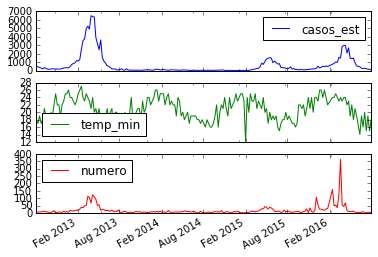

In [43]:
Short[['casos_est', 'temp_min', 'numero']].plot(subplots=True);